Logs   
- [2023/03/08]   
  Restart this notebook if you change the scratch library

- [2024/02/06]    
  `%load_ext` and `%autoreload` magic commands avoid restarting this notebook
  when you change the scratch library.   

- [2024/02/11]   
  I suggest myself in the future to read (Agresti et al., 2023) - Statistics   
  Chapter 8 and 9 before reading this notebook.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc_special
import scipy.stats as sc_stats

from typing import Tuple, List
from scratch.probability import Probability as prob
from collections import Counter
from matplotlib.patches import ConnectionPatch

In [12]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

The *science* part of data science frequently involves forming   
and testing *hypotheses* about our data and the processes that generate it.

(Agresti et al., 2023)    
You need to decide on your hypotheses before looking at any data you plan   
to use for the test! Otherwise, your evidence and conclusion may appear much   
stronger than they actually are. 
This is one of the fundamental principles of significance testing   
and scientific integrity

## Statistical Hypothesis Testing

Hypothesis -> statistics (distributions) -> how likely the hypothesis holds

**Null hypothesis**, $H_0$: some default position    
**Alternative hypothesis**, $H_1$: other hypotheses that we would like to compare with $H_0$ 

## Example: Flipping a Coin

**Null hypothesis**, $H_0$: The coin is fair ($p = 0.5$)    
**Alternative hypothesis**, $H_1$: ($p \neq 0.5$)

In our test, we flip the coin at some number $n$ times, 
and count the number of heads $X$.

In [14]:
def normal_approximation_to_binomial(
  n: int, p: float) -> Tuple[float, float]:

  """Returns mu and sigma corresponding to a Binomial(n, p)""" 
  mu = p * n
  sigma = np.sqrt(p * (1 - p) * n)
  return mu, sigma

In [15]:
# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = prob.normal_cdf

In [16]:
# It's above the threshold if it's not below the threshold
def normal_probability_above(low: float, mu: float = 0, sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is greater than lo.""" 
  return 1 - prob.normal_cdf(low, mu, sigma)

# It's between if it's less than `high`, but not less than `low`
def normal_probability_between(low: float, high: float, mu: float = 0, sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is between `low` and `high`.""" 
  return prob.normal_cdf(high, mu, sigma) - prob.normal_cdf(low, mu, sigma)

# it's outside if it's not between
def normal_probability_outside(low: float, high: float, 
  mu: float = 0, sigma: float = 1) -> float:
  """The probability that an N(mu, sigma) is not between low and high.""" 
  return 1 - normal_probability_between(low, high, mu, sigma)


[You do not need to understand the following codes]

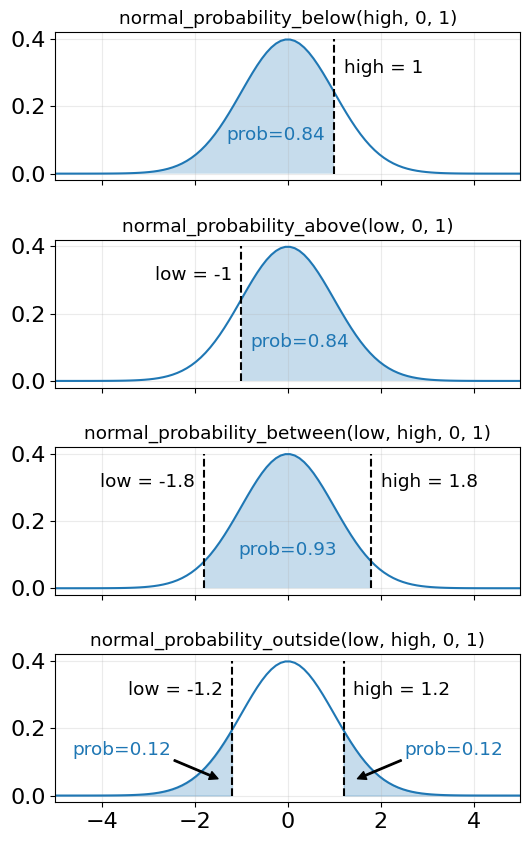

In [17]:
fig, axes = plt.subplots(nrows=4, figsize=(6, 10), sharex=True)

xlim = [-5, 5]
xs = np.linspace(*xlim, 100)
# -- normal_probability_below
axes[0].plot(xs, prob.normal_pdf(xs))
high = 1
below = normal_probability_below(high)
x_fill = np.linspace(-5, high, 100)
axes[0].fill_between(x_fill, prob.normal_pdf(x_fill), alpha=0.25)
axes[0].plot([high, high], [0, 0.4], linestyle="--", color="k")
axes[0].text(1.2, 0.3, f"high = {high}", ha="left", fontsize="small")
axes[0].text(0.8, 0.1, f"prob={below:.2f}", fontsize="small", color="tab:blue",
             ha="right")

axes[0].set_title("normal_probability_below(high, 0, 1)", fontsize="small")
axes[0].set_xlim(xlim)
axes[0].grid("on")

# -- normal_probability_above(low, 0, 1)
axes[1].plot(xs, prob.normal_pdf(xs))

low = -1
above = normal_probability_above(low)
x_fill = np.linspace(low, 5, 100)
axes[1].fill_between(x_fill, prob.normal_pdf(x_fill), alpha=0.25)

axes[1].plot([low, low], [0, 0.4], linestyle="--", color="k")
axes[1].text(-1.2, 0.3, f"low = {low}", ha="right", fontsize="small")
axes[1].text(-0.8, 0.1, f"prob={above:.2f}", fontsize="small", color="tab:blue")

axes[1].set_title("normal_probability_above(low, 0, 1)", fontsize="small")
axes[1].set_xlim(xlim)
axes[1].grid("on")

## -- normal_probability_between
axes[2].plot(xs, prob.normal_pdf(xs))

low = -1.8
high = 1.8
between = normal_probability_between(low, high)
x_fill = np.linspace(low, high, 100)
axes[2].fill_between(x_fill, prob.normal_pdf(x_fill), alpha=0.25)
axes[2].plot([low, low], [0, 0.4], linestyle="--", color="k")
axes[2].plot([high, high], [0, 0.4], linestyle="--", color="k")
axes[2].text(-2, 0.3, f"low = {low}", ha="right", fontsize="small")
axes[2].text(2, 0.3, f"high = {high}", ha="left", fontsize="small")
axes[2].text(0.0, 0.1, f"prob={between:.2f}", ha="center", fontsize="small", color="tab:blue")

axes[2].set_title("normal_probability_between(low, high, 0, 1)", fontsize="small")
axes[2].grid("on")

## -- normal_probability_outside
axes[3].plot(xs, prob.normal_pdf(xs))

low = -1.2
high = 1.2 
outside = normal_probability_outside(low, high)
x_fill_left = np.linspace(-5, low, 50)
x_fill_right = np.linspace(high, 5, 50)
axes[3].fill_between(x_fill_left, prob.normal_pdf(x_fill_left), color="tab:blue", alpha=0.25)
axes[3].fill_between(x_fill_right, prob.normal_pdf(x_fill_right), color="tab:blue", alpha=0.25)
axes[3].plot([low, low], [0, 0.4], linestyle="--", color="k")
axes[3].plot([high, high], [0, 0.4], linestyle="--", color="k")
axes[3].text(-1.4, 0.3, f"low = {low}", ha="right", fontsize="small")
axes[3].text(1.4, 0.3, f"high = {high}", ha="left", fontsize="small")
axes[3].annotate(f"prob={outside/2.:.2f}", [-1.5, 0.05], [-2.5, 0.12], 
                 ha="right", fontsize="small", color="tab:blue",
                 arrowprops={"facecolor": "k", "width": 1, "headwidth": 6,
                             "headlength": 6})
axes[3].annotate(f"prob={outside/2.:.2f}", [1.5, 0.05], [2.5, 0.12], 
                 ha="left", fontsize="small", color="tab:blue",
                 arrowprops={"facecolor": "k", "width": 1, "headwidth": 6,
                             "headlength": 6})

axes[3].set_title("normal_probability_outside(low, high, 0, 1)", fontsize="small")
axes[3].grid("on")

plt.subplots_adjust(hspace=0.4)
plt.show(fig)

Find the upper, lower, or two-sided bounds given the probability
symmetric to the mean.

In [18]:
def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
  """Returns the z for which P(Z <= z) = probability""" 
  return prob.inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
  """Returns the z for which P(Z >= z) = probability"""
  return prob.inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float, mu: float = 0, sigma: float = 1) -> Tuple[float, float]:
  """
  Returns the symmetric (about the mean) bounds that contains
  the specified probability
  """  
  tail_probability = (1 - probability) / 2

  # upper bound should have tail_probability above it
  upper_bound = normal_lower_bound(tail_probability, mu, sigma)

  # lower bound should have tail_probability below it
  lower_bound = normal_upper_bound(tail_probability, mu, sigma)

  return lower_bound, upper_bound

[You do not need to understand the following codes]

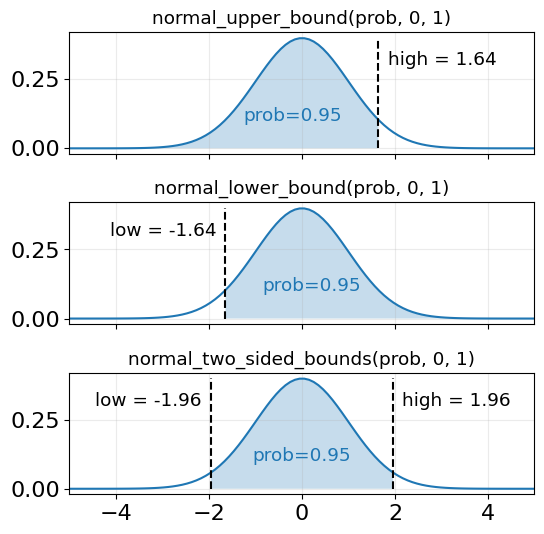

In [19]:
fig, axes = plt.subplots(nrows=3, figsize=(6, 6), sharex=True)

xlim = [-5, 5]
xs = np.linspace(*xlim, 100)

# -- normal_upper_bound
axes[0].plot(xs, prob.normal_pdf(xs))

prob_val = 0.95 
u_bound = normal_upper_bound(prob_val)
x_fill = np.linspace(-5, u_bound, 100)
axes[0].fill_between(x_fill, prob.normal_pdf(x_fill), alpha=0.25)

axes[0].plot([u_bound, u_bound], [0, 0.4], linestyle="--", color="k")
axes[0].text(u_bound+0.2, 0.3, f"high = {u_bound:.2f}", ha="left", fontsize="small")
axes[0].text(-0.2, 0.1, f"prob={prob_val:.2f}", ha="center", fontsize="small", color="tab:blue")

axes[0].set_title("normal_upper_bound(prob, 0, 1)", fontsize="small")
axes[0].set_xlim(xlim)
axes[0].grid("on")

# -- normal_lower_bound
axes[1].plot(xs, prob.normal_pdf(xs))

prob_val = 0.95
l_bound = normal_lower_bound(prob_val)
x_fill = np.linspace(l_bound, 5, 100)
axes[1].fill_between(x_fill, prob.normal_pdf(x_fill), alpha=0.25)

axes[1].plot([l_bound, l_bound], [0, 0.4], linestyle="--", color="k")
axes[1].text(l_bound-0.2, 0.3, f"low = {l_bound:.2f}", ha="right", fontsize="small")
axes[1].text(0.2, 0.1, f"prob={prob_val:.2f}", ha="center", fontsize="small", color="tab:blue")

axes[1].set_title("normal_lower_bound(prob, 0, 1)", fontsize="small")
axes[1].set_xlim(xlim)
axes[1].grid("on")


# -- normal_two_sided_bounds
axes[2].plot(xs, prob.normal_pdf(xs))

prob_val = 0.95
l_bound, u_bound = normal_two_sided_bounds(prob_val)
x_fill = np.linspace(l_bound, u_bound, 100)
axes[2].fill_between(x_fill, prob.normal_pdf(x_fill), alpha=0.25)

axes[2].plot([l_bound, l_bound], [0, 0.4], linestyle="--", color="k")
axes[2].plot([u_bound, u_bound], [0, 0.4], linestyle="--", color="k")
axes[2].text(l_bound-0.2, 0.3, f"low = {l_bound:.2f}", ha="right", fontsize="small")
axes[2].text(u_bound+0.2, 0.3, f"high = {u_bound:.2f}", ha="left", fontsize="small")
axes[2].text(0, 0.1, f"prob={prob_val:.2f}", ha="center", fontsize="small", color="tab:blue")

axes[2].set_title("normal_two_sided_bounds(prob, 0, 1)", fontsize="small")
axes[2].set_xlim(xlim)
axes[2].grid("on")


plt.subplots_adjust(hspace=0.4)
plt.show(fig)

The table below might be helpful to understand the following type of error

| Error name | Null hypothesis ground truth | $H_0$ is rejected? | Other name |
|------------|------------------|--------------------------------------|------------|
| Type 1 error | $H_0$ is true  | Yes | False Positive |
| Type 2 error | $H_0$ is false | No  | False Negative | 

(Agresti et al., 2023)

<table>
  <tr>
    <td rowspan=2><b>Reality About H<sub>0
    <td colspan=2 style="text-align:center"><b>Decision
  <tr>
    <td> <b>Do Not Reject H<sub>0
    <td> <b>Reject H<sub>0
  <tr>
    <td>H<sub>0 true
    <td>Correct decision
    <td>Type I error
  <tr>
    <td>H<sub>0 false
    <td>Type II error
    <td>Correct decision
</table>

### Type 1 error

Let's say that we choose to flip  the coin $n = 1,000$ times.
If our hyphotesis of fairness is true, $X$ (the number of head)
should be distributed approximately normally with mean $np = 1\,000 (0.5) = 500$ and standard deviation ($\sqrt{np(1-p)} = \sqrt{1\,000(0.5)(0.5)} = 15.81$

We need to make a decision about *significance* &mdash; how willing are to make a *type 1 error* ("false positive"), in which we reject $H_0$ even though it's true.


In [20]:
mu_0, sigma_0 = normal_approximation_to_binomial(1_000, 0.5)
mu_0, sigma_0

(500.0, 15.811388300841896)

Consider the test that rejects $H_0$ if $X$ fails outside the bounds
given by:

In [21]:
# significance level = 0.05 = 5%
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(f"lower bound: {lower_bound:.0f}")
print(f"upper_bound: {upper_bound:.0f}")

lower bound: 469
upper_bound: 531


Assumming $p$ really equals 0.5 (i.e., $H_0$ is true), there is just a 5% chance   
we observe an $X$ that lies outside this interval, which is the exact significance we wanted.  
Said differently, if $H_0$ is true, then, approximately 19 times
out of 20 (95% of 20 is 19), this test will give the correct result.

[You do not need to understand the following code]

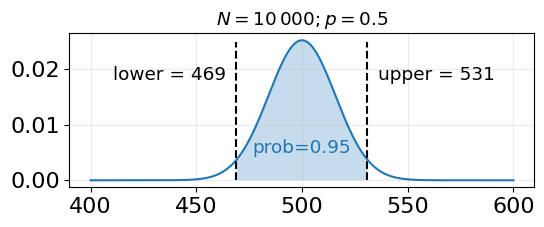

In [22]:
fig, ax = plt.subplots(figsize=(6, 2))

xs = np.linspace(400, 600, 1000)

ax.plot(xs, prob.normal_pdf(xs, mu=mu_0, sigma=sigma_0))
x_fill = np.linspace(lower_bound, upper_bound, 100)
ax.fill_between(x_fill, prob.normal_pdf(x_fill, mu=mu_0, sigma=sigma_0), alpha=0.25)
ax.plot([lower_bound, lower_bound], [0, 0.025], linestyle="--", color="k")
ax.plot([upper_bound, upper_bound], [0, 0.025], linestyle="--", color="k")
ax.text(lower_bound - 5, 0.018, f"lower = {lower_bound:.0f}", ha="right", fontsize="small")
ax.text(upper_bound + 5, 0.018, f"upper = {upper_bound:.0f}", ha="left", fontsize="small")
ax.text(500, 0.005, f"prob=0.95", ha="center", fontsize="small", color="tab:blue")

ax.set_title(r"$N = 10\,000; p = 0.5$", fontsize="small")
ax.grid("on")

plt.show(fig)

### Type 2 error

We are also often interested in the *power* of a test, which is
the probability of not making a *type 2 error* ("false negative"),    
in which we fail to reject $H_0$ even though it's false.

We assume that the coin is slightly biased toward heads ($p = 0.55$)

In [23]:
# fail to reject H_0 means that we fall inside the interval of 95% bound.
# 95% bounds based on assumption p is 0.5 (H_0)
low, high = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(f"(fair, p=0.5)  low: {low:.0f}")
print(f"(fair, p=0.5) high: {high:.0f}")

# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1_000, 0.55)
print(f"mu_1: {mu_1}")
print(f"sigma_1: {sigma_1}")

# a type 2 error means we fail to reject the null hypothesis,
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(low, high, mu_1, sigma_1)  # beta
power = 1 - type_2_probability   # 0.887 (not making type 2 error, 1 - beta)
print(f"power: {power}")


(fair, p=0.5)  low: 469
(fair, p=0.5) high: 531
mu_1: 550.0
sigma_1: 15.732132722552274
power: 0.886548001295367


[You do not need to understand the following code]

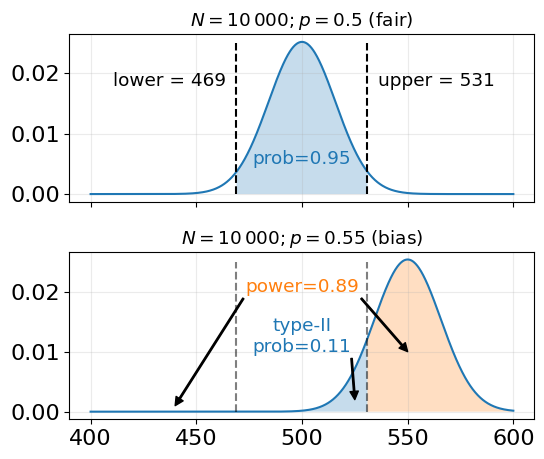

In [32]:
# need to run the above cell to update high and low variables 
fig, axes = plt.subplots(nrows=2, figsize=(6, 5), sharex=True)

xs = np.linspace(400, 600, 1000)

axes[0].plot(xs, prob.normal_pdf(xs, mu=mu_0, sigma=sigma_0))
x_fill = np.linspace(low, high, 100)
axes[0].fill_between(x_fill, prob.normal_pdf(x_fill, mu=mu_0, sigma=sigma_0), alpha=0.25)
axes[0].plot([low, low], [0, 0.025], linestyle="--", color="k")
axes[0].plot([high, high], [0, 0.025], linestyle="--", color="k")
axes[0].text(low - 5, 0.018, f"lower = {low:.0f}", ha="right", fontsize="small")
axes[0].text(high + 5, 0.018, f"upper = {high:.0f}", ha="left", fontsize="small")
axes[0].text(500, 0.005, f"prob=0.95", ha="center", fontsize="small", color="tab:blue")

axes[0].set_title(r"$N = 10\,000; p = 0.5$ (fair)", fontsize="small")
axes[0].grid("on")

# -- bias coined (two-sided test)
axes[1].plot(xs, prob.normal_pdf(xs, mu=mu_1, sigma=sigma_1))
axes[1].fill_between(x_fill, prob.normal_pdf(x_fill, mu=mu_1, sigma=sigma_1), alpha=0.25)
x_fill_right = np.linspace(upper_bound, 600, 100)
axes[1].fill_between(x_fill_right, prob.normal_pdf(x_fill_right, mu=mu_1, sigma=sigma_1), alpha=0.25)
axes[1].plot([low, low], [0, 0.025], linestyle="--", color="k", alpha=0.5)
axes[1].plot([high, high], [0, 0.025], linestyle="--", color="k", alpha=0.5)

axes[1].set_title(r"$N = 10\,000; p = 0.55$ (bias)", fontsize="small")
axes[1].grid("on")

arrowprops = {"facecolor": "k", "width": 1, "headwidth": 6, "headlength": 6}
axes[1].annotate(f"type-II\nprob={type_2_probability:.2f}", [525, 0.002], [500, 0.01], 
                 ha="center", fontsize="small", color="tab:blue",
                 arrowprops=arrowprops)
axes[1].annotate(f"power={power:.2f}", [550, 0.01], [500, 0.02], ha="center",
                 fontsize="small", color="w", 
                 arrowprops=arrowprops)
axes[1].annotate(f"power={power:.2f}", [440, 0.001], [500, 0.02], ha="center",
                 fontsize="small", color="tab:orange", 
                 arrowprops=arrowprops)

plt.subplots_adjust(hspace=0.3)

plt.show(fig)

The next case, what happens to the *power* of the test, if the coin 
is not biased toward heads, or that $p \leq 0.5$.  
In that case we want a *one-sided test* that rejects the null 
hypothesis when $X$ is much larger than 500 but not when $X$
is smaller than 500.

Null hypothesis ($H_0$): $p \leq 0.5$    
Alternative hypotehsis ($H_1$): $p > 0.5$   
(in fact we have $p = 0.55$)

In [15]:
# With 5% significance test (one-sided test)
# The result is smaller than two-sided test because we need more
# probability in the upper tail (5% only for high tail side)
high_one_sided = normal_upper_bound(0.95, mu_0, sigma_0)
print(f"high_one_sided: {high_one_sided:.0f}")

high_one_sided: 526


In [16]:
# a type 2 error means we fail to reject the null hypothesis 
# for this one-side test, the null hypothesis is p <= 0.5
# which will happen when X is still below the upper bound of
# original interval (p = 0.5)
type_2_probability_one_sided = normal_probability_below(high_one_sided, 
  mu_1, sigma_1)

power = 1 - type_2_probability_one_sided   # not making type 2 error 
                                           # one-sided
print(f"the power of the test: {power}")

the power of the test: 0.9363794803307173


Comparing to the previous one, the test is more powerful 
that it no longer reject $H_0 (p \leq 0.5)$  when $X$ is below
469 (which is very unlikely to happen if $H_1$ is true)
and instead reject $H_0$ when $X$ is between 526 and 531 
(which is somewhat likely to happen if $H_1$ is true)

In the above example $H_1$ is true ($p = 0.55 > 0.5$)
and we have high probability for that alternative hypothesis.


[You do not need to understand the following codes]

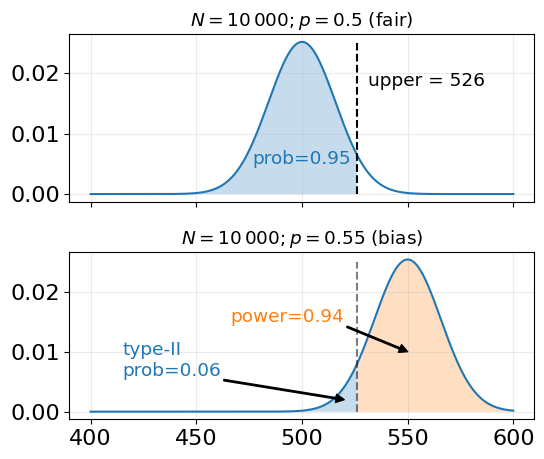

In [17]:
# Need to run the above cell to update power variable
fig, axes = plt.subplots(nrows=2, figsize=(6, 5), sharex=True)

xs = np.linspace(400, 600, 1000)

axes[0].plot(xs, prob.normal_pdf(xs, mu=mu_0, sigma=sigma_0))
x_fill = np.linspace(400, high_one_sided, 100)
axes[0].fill_between(x_fill, prob.normal_pdf(x_fill, mu=mu_0, sigma=sigma_0), alpha=0.25)
axes[0].plot([high_one_sided, high_one_sided], [0, 0.025], linestyle="--", color="k")
axes[0].text(high_one_sided + 5, 0.018, f"upper = {high_one_sided:.0f}", ha="left", fontsize="small")
axes[0].text(500, 0.005, f"prob=0.95", ha="center", fontsize="small", color="tab:blue")

axes[0].set_title(r"$N = 10\,000; p = 0.5$ (fair)", fontsize="small")
axes[0].grid("on")

# -- bias coined (one-sided test)
axes[1].plot(xs, prob.normal_pdf(xs, mu=mu_1, sigma=sigma_1))
axes[1].fill_between(x_fill, prob.normal_pdf(x_fill, mu=mu_1, sigma=sigma_1), alpha=0.25)
x_fill_right = np.linspace(high_one_sided, 600, 100)
axes[1].fill_between(x_fill_right, prob.normal_pdf(x_fill_right, mu=mu_1, sigma=sigma_1), alpha=0.25)
axes[1].plot([high_one_sided, high_one_sided], [0, 0.025], linestyle="--", color="k", alpha=0.5)

axes[1].set_title(r"$N = 10\,000; p = 0.55$ (bias)", fontsize="small")
axes[1].grid("on")

arrowprops = {"facecolor": "k", "width": 1, "headwidth": 6, "headlength": 6}
axes[1].annotate(f"type-II\nprob={type_2_probability_one_sided:.2f}", [520, 0.002], [415, 0.006], 
                 ha="left", fontsize="small", color="tab:blue",
                 arrowprops=arrowprops)
axes[1].annotate(f"power={power:.2f}", [550, 0.01], [520, 0.015], ha="right",
                 fontsize="small", color="tab:orange", 
                 arrowprops=arrowprops)

plt.subplots_adjust(hspace=0.3)
plt.show(fig)

## $p$-Values

Instead of choosing bounds based on some probability cutoff, we compute  
the probability--assuming $H_0$ is true--that we would see a value at least
as extreme (less than a lower bound or greater than a upper bound)   
as the one we actually observed

In [18]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
  """ 
  How likely are we to see a value at least as extreme as x (in either
  direction) if our values are from an N(mu, sigma)?    
  This is the probability for the alternative hypothesis, H_a, where
  we have H_a: p != p_0 (some population proportion, p_0).  
  """ 
  if x >= mu:
    # x is greater than mean, so the tail is everything greater than x
    return 2 * normal_probability_above(x, mu, sigma)

  else:
    # x is less than the mean, so the tail is everything less than x
    return 2 * normal_probability_below(x, mu, sigma)

If we were to see 530 heads, we could compute

In [19]:
# We use a value 529.5 instead of 530 because
# of continuity correction. It is better to estimate
# using P(529.5 <= X < 530.5) rather than  P(530 <= X <= 531)
two_sided_p_value(529.5, mu_0, sigma_0)
# two_sided_p_value(475, mu_0, sigma_0)


0.06207721579598835

[You do not need to understand the following code]

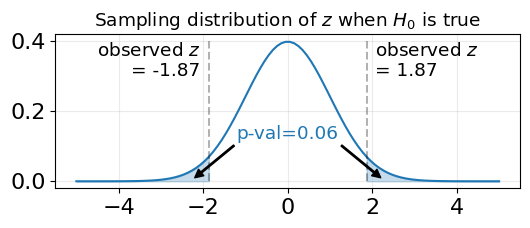

In [20]:
fig, ax = plt.subplots(figsize=(6, 2), sharex=True)

xlim = [-5, 5]
xs = np.linspace(*xlim, 100)

## -- normal_probability_outside
ax.plot(xs, prob.normal_pdf(xs))

high = (529.5 - mu_0)/sigma_0
low = -high  

# low = (475 - mu_0)/sigma_0
# high = -low

outside = normal_probability_outside(low, high)
x_fill_left = np.linspace(-5, low, 50)
x_fill_right = np.linspace(high, 5, 50)
ax.fill_between(x_fill_left, prob.normal_pdf(x_fill_left), color="tab:blue", alpha=0.25)
ax.fill_between(x_fill_right, prob.normal_pdf(x_fill_right), color="tab:blue", alpha=0.25)
ax.plot([low, low], [0, 0.4], linestyle="--", color="k", alpha=.3)
ax.plot([high, high], [0, 0.4], linestyle="--", color="k", alpha=.3)
ax.text(low-.2, 0.3, f"observed $z$\n= {low:.2f}", ha="right", fontsize="small")
ax.text(high+.2, 0.3, f"observed $z$\n= {high:.2f}", ha="left", fontsize="small")
ax.annotate(f"p-val={outside:.2f}", [2.2, 0.01], [0, 0.12], 
                 ha="center", fontsize="small", color="w",
                 arrowprops={"facecolor": "k", "width": 1, "headwidth": 6,
                             "headlength": 6})
ax.annotate(f"p-val={outside:.2f}", [-2.2, 0.01], [0, 0.12], 
            ha="center", fontsize="small", color="tab:blue",
            arrowprops={"facecolor": "k", "width": 1, "headwidth": 6,
                        "headlength": 6})

ax.set_title("Sampling distribution of $z$ when $H_0$ is true", fontsize="small")
ax.grid("on")

plt.subplots_adjust(hspace=0.4)
plt.show(fig)


A simulation to show this *p-value*

In [21]:
rng = np.random.default_rng(2023_03_23)

extreme_value_count = 0
for _ in range(1_000):  # <-- num of experiment, each experiment flips 1000 times
  num_heads = sum(1 if rng.random() < 0.5 else 0    # Count # of heads
                  for _ in range(1_000))            # in 1000 flips

  if num_heads >= 530 or num_heads <= 470:  # and count how often
    extreme_value_count += 1                # the # is `extreme`

# p-value was 0.062 => ~= 62 extreme values out of 1_000 experiments
print(f"extreme_value_count: {extreme_value_count}")

extreme_value_count: 60


Since the *p-value* = 0.062 is greater than our 5% significance,
we don't reject the null.

[Note: The word _significant_ in statistics refers to the $p$-value of a test  
being below the significance level, but does not necessarily imply a significance  
result in the everyday meaning of the word (as in important or noteworthy)]


If we instead saw 532 heads, the *p-value* would be:

In [22]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

For one-sided test

In [23]:
upper_p_value = normal_probability_above 
lower_p_value = normal_probability_below

In [24]:
# If we saw 525 heads (one-sided test)
# We wouldn't reject the null (0.06 > 0.05)
upper_p_value(524.5, mu_0, sigma_0)


0.06062885772582072

[You do not need to understand the following codes]

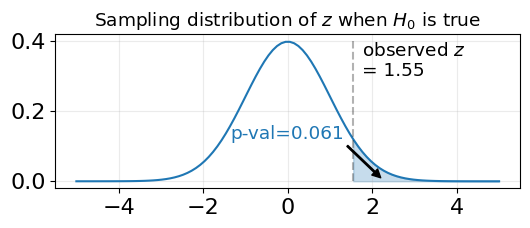

In [25]:
fig, ax = plt.subplots(figsize=(6, 2), sharex=True)

xlim = [-5, 5]
xs = np.linspace(*xlim, 100)

## -- normal_probability_outside
ax.plot(xs, prob.normal_pdf(xs))

bound = 524.5
bound = (bound - mu_0)/sigma_0
if bound > 0:
  p_val = normal_probability_above(bound)
  x_fill = np.linspace(bound, 5, 50)
  text_pos = bound + .2
  text_align = "left"
else: 
  p_val = normal_probability_below(bound)
  x_fill = np.linspace(-5, bound, 50)
  text_pos = bound - .2
  text_align = "right"

ax.fill_between(x_fill, prob.normal_pdf(x_fill), color="tab:blue", alpha=0.25)
ax.plot([bound, bound], [0, 0.4], linestyle="--", color="k", alpha=.3)
ax.text(text_pos, 0.3, f"observed $z$\n= {bound:.2f}", ha=text_align, fontsize="small")
ax.annotate(f"p-val={p_val:.3f}", [2.2, 0.01], [0, 0.12], 
                 ha="center", fontsize="small", color="tab:blue",
                 arrowprops={"facecolor": "k", "width": 1, "headwidth": 6,
                             "headlength": 6})

ax.set_title("Sampling distribution of $z$ when $H_0$ is true", fontsize="small")
ax.grid("on")

plt.subplots_adjust(hspace=0.4)
plt.show(fig)

In [26]:
# If we saw 527 heads (one-sided test)
# we would reject the null (0.04 < 0.05)
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242

[You do not need to understand the following codes]

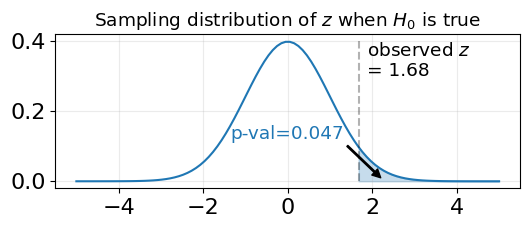

In [27]:
fig, ax = plt.subplots(figsize=(6, 2), sharex=True)

xlim = [-5, 5]
xs = np.linspace(*xlim, 100)

## -- normal_probability_outside
ax.plot(xs, prob.normal_pdf(xs))

bound = 526.5
bound = (bound - mu_0)/sigma_0
if bound > 0:
  p_val = normal_probability_above(bound)
  x_fill = np.linspace(bound, 5, 50)
  text_pos = bound + .2
  text_align = "left"
else: 
  p_val = normal_probability_below(bound)
  x_fill = np.linspace(-5, bound, 50)
  text_pos = bound - .2
  text_align = "right"

ax.fill_between(x_fill, prob.normal_pdf(x_fill), color="tab:blue", alpha=0.25)
ax.plot([bound, bound], [0, 0.4], linestyle="--", color="k", alpha=.3)
ax.text(text_pos, 0.3, f"observed $z$\n= {bound:.2f}", ha=text_align, fontsize="small")
ax.annotate(f"p-val={p_val:.3f}", [2.2, 0.01], [0, 0.12], 
                 ha="center", fontsize="small", color="tab:blue",
                 arrowprops={"facecolor": "k", "width": 1, "headwidth": 6,
                             "headlength": 6})

ax.set_title("Sampling distribution of $z$ when $H_0$ is true", fontsize="small")
ax.grid("on")

plt.subplots_adjust(hspace=0.4)
plt.show(fig)


## Confidence Intervals

(Agresti et al., 2023)   
The 95% confidence refers not to a probability for the population proportion $p$   
but rather to a probability that applies to the confidence interval _methods_ in  
its relative frequency sense: If we use it over and over for various samples,  
in the long run we capture the true parameter 95% of the time.

Do not say that there is a 95% probability that the population parameter will  
fall in the interval.

For example, we want to know the coin is fair or not.   
By flipping 1_000 times, we observe 525 heads.   
We don't know the $p$, and we use our estimate

In [28]:
p_hat = 525 / 1_000
mu = p_hat
sigma = np.sqrt(p_hat * (1 - p_hat) / 1000)

print(f"mu: {mu}")
print(f"sigma: {sigma}")

# Using 95% cconfident
normal_two_sided_bounds(0.95, mu, sigma)

mu: 0.525
sigma: 0.015791611697353755


(0.4940490278129096, 0.5559509721870904)

In particular, we do not conclude that the coins is unfair, since
0.5 falls within our confidence interval.

If instead, we had seen 540 heads:

In [29]:
p_hat = 540 / 1_000
mu = p_hat
sigma = np.sqrt(p_hat * (1 - p_hat) / 1_000)
normal_two_sided_bounds(0.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

Here, "fair coin" doesn't lie in the confidence interval.  
(The "fair coin" hypothesis doesn't pass a test that you would
expect it to pass 95% of the time if it were true)

[You do not need to understand this code below]

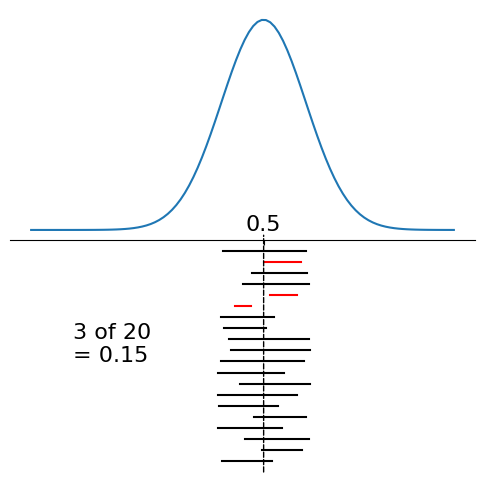

In [112]:
# seed = 24_02_12
seed = None
population_proportion = 0.5
population_size = 10000
sample_size = 100 
significance_lvl = 0.05
num_of_experiment = 20
z_score = abs(sc_stats.norm.ppf(significance_lvl/2.))
rng = np.random.default_rng(seed)

fig, axes = plt.subplots(nrows=2, figsize=(6, 6), sharex=True)

x1_space = np.linspace(-5, 5, 100)
y1_space = prob.normal_pdf(x1_space, population_proportion)
axes[0].plot(x1_space, y1_space)
axes[0].set_xticks([0.5])
axes[0].text(0.5, 0., "0.5", ha="center")
axes[0].spines[["top", "left", "right"]].set_visible(False)
axes[0].set_yticks([])

y2_space = np.linspace(1, 20, num_of_experiment)[::-1]

axes[1].axis("off")

num_of_outside = 0
for i in range(num_of_experiment):
  sample_proportion = rng.normal(loc=population_proportion)
  while sample_proportion < 0 or sample_proportion > 1:
    sample_proportion = rng.normal(loc=population_proportion)
  sample_standard_error = np.sqrt(sample_proportion*(1.-sample_proportion))
  sample_margin_of_err = z_score*sample_standard_error
  lower_bound = sample_proportion - sample_margin_of_err
  upper_bound = sample_proportion + sample_margin_of_err
  # sample_proportion, sample_margin_of_err 
  if lower_bound < 0.5 < upper_bound:
    color = "k" 
  else:
    color = "r"
    num_of_outside += 1

  axes[1].plot([lower_bound, upper_bound], [y2_space[i], y2_space[i]],
                color=color)
axes[1].text(-4, 10, f"{num_of_outside} of {num_of_experiment}\n= {num_of_outside/num_of_experiment}",
             ha="left")

con = ConnectionPatch(xyA=(0.5, 0), coordsA=axes[1].transData,
                      xyB=(0.5, -0.01), coordsB=axes[0].transData, linestyle="--")
fig.add_artist(con)


plt.subplots_adjust(hspace=0)
plt.show(fig)



## $p$-Hacking 


When you conduct a study, it is not ethical to perform lots and lots of  
significance tests but only report results when the $p$-value is small.

You can set out the data to find something "significant" result.   
It can be done by remove outlier (like in the section Correlation)

With significant level (0.05), we can find an outlier 5% of the time
for 1,000 experiments.   
Removing the outlier, we hack our data to be having a smaller amount of outlier.

In [29]:
def run_experiment(rng) -> List[bool]:
  """Flips a fair coin 1_000 times, True = heads, False = tails""" 
  return rng.random(1_000) < 0.5

def reject_fairness(experiment: List[bool]) -> bool:
  """
  Using the 5% significance levels.
  Interval is computer from `normal_two_sided_bounds(0.95, mu_0, sigma_0)`
  where mu_0, sigma_0 are computed from
  mu_0, sigma_0 = normal_approximation_to_binomial(1_000, 0.5)
  """ 
  num_heads = sum(experiment) 
  return num_heads < 469 or num_heads > 531

In [30]:
rng = np.random.default_rng(2023_03_23)
experiments = [run_experiment(rng) for _ in range(1_000)]   # 1,000 experiments
num_rejections = len([experiment for experiment in experiments
                     if reject_fairness(experiment)])

# 46 rejections from 1_000 experiments
print(f"num_rejections: {num_rejections}")  
print(num_rejections / 1000)  # approximately 5%

num_rejections: 46
0.046


Do not tweak the data to get better significant *p-value*
if you want to do good *science*.

## Example: Running an A/B Test

How to use statistical inference to decide between two results which  
one is better when the differences are not so stark.

The null hypothesis: $H_0: p_A = p_B$   
The alternative hypothesis: $H_a: p_A \neq p_B$

In [31]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
  p = n / N
  sigma = np.sqrt(p * (1 - p) / N)
  return p, sigma

$$
  z_\textrm{score} = \frac{p_B - p_A}{\sqrt{\sigma_A^2 + \sigma_B^2}}
$$

In [32]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
  p_A, sigma_A = estimated_parameters(N_A, n_A)
  p_B, sigma_B = estimated_parameters(N_B, n_B)
  return (p_B - p_A) / np.sqrt(sigma_A ** 2 + sigma_B ** 2)

If "tastes great" gets 200 clicks out of 1,000 views and "less bias" gets 
180 clicks out of 1,000 views, the statistics equals:

In [33]:
z = a_b_test_statistic(1_000, 200, 1_000, 180)
z, two_sided_p_value(z)

(-1.1403464899034472, 0.2541419765422359)

With a significant level 0.05, we do not reject the null hypothesis $H_0$.   
For this case, we can say that the two ads are equally effective with
significant level 0.05

The case for a greater difference between two ads.   
If "less bias" only got 150 clicks, we would have:

In [34]:
z = a_b_test_statistic(1_000, 200, 1_000, 150)
z, two_sided_p_value(z)

(-2.948839123097944, 0.003189699706216853)

## Bayesian Inference

Any prior distribution that you choose for the parameter distribution    
will eventially end up at the same distribution when they are given
the same evidence.

We use beta distribution to easily simulate different prior using two parameters
$\alpha$ and $\beta$ and update by the number of coin flipping

$$
  B(z_1, z_2) = \frac{\Gamma(z_1)\Gamma(z_2)}{\Gamma(z_1 + z_2)}
$$

$$
  f(x; \alpha, \beta)
    = \frac{1}{B(\alpha, \beta)}\,x^{\alpha-1}(1 - x)^{\beta - 1}
$$

In [33]:
def B(alpha: float, beta: float) -> float:
  """A normalizing constant so that the total probability is 1""" 
  if sc_special.gamma(alpha + beta) < np.inf:
    return sc_special.gamma(alpha) * sc_special.gamma(beta) \
      / sc_special.gamma(alpha + beta)
  else:
    return 0

def beta_pdf(x: float, alpha: float, beta: float) -> float:
  pdf = np.zeros_like(x)
  beta_val = B(alpha, beta)
  logical_index = np.logical_and(x >= 0, x <= 1)
  if beta_val > 0:
    pdf[logical_index] = x[logical_index]**(alpha - 1) \
      * (1 - x[logical_index])**(beta - 1) / B(alpha, beta)
  else:
    rv = sc_stats.beta(alpha, beta)
    pdf = rv.pdf(x)
  return pdf

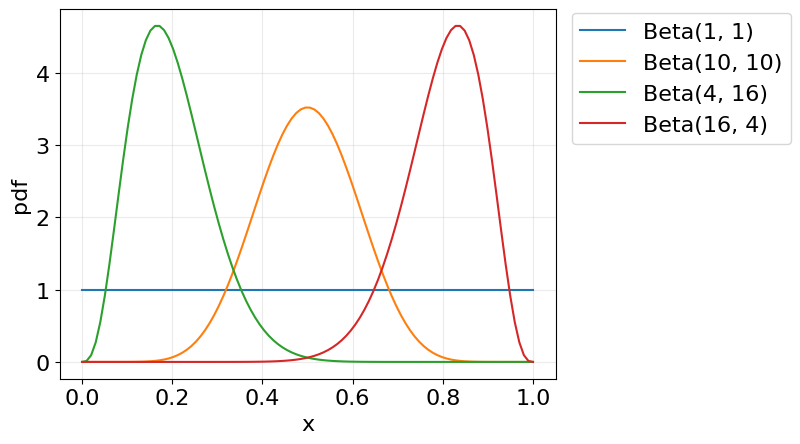

In [72]:
fig, ax = plt.subplots()

N_data_points = 100
x_data = np.linspace(0, 1, N_data_points)

beta_pdf_config = [
  [1, 1], [10, 10], [4, 16], [16, 4]] 

for alpha, beta in beta_pdf_config:
  y_data = beta_pdf(x_data, alpha, beta)
  ax.plot(x_data, y_data, label=f"Beta({alpha}, {beta})")

ax.set_xlabel("x")
ax.set_ylabel("pdf")
ax.grid("on")
ax.legend(loc="upper left", bbox_to_anchor=[1.01, 1.02])

plt.show(fig)

The property of beta distribution is _conjugate prior_ to binomial distribution.   
Whenever you update a beta distribution prior using observations from the   
the corresponding binomial, you will get back a beta posterior.

In [73]:
seed = 24_02_12
rng = np.random.default_rng(seed)
update_1 = Counter(rng.choice(["H", "T"], 10, replace=True))   # 10 flips
print(update_1)

rng = np.random.default_rng(seed)
update_2 = Counter(rng.choice(["H", "T"], 2000, replace=True))  # 2_000 flips
print(update_2)

Counter({'T': 7, 'H': 3})
Counter({'T': 1007, 'H': 993})


[You do not need to understand the following codes]

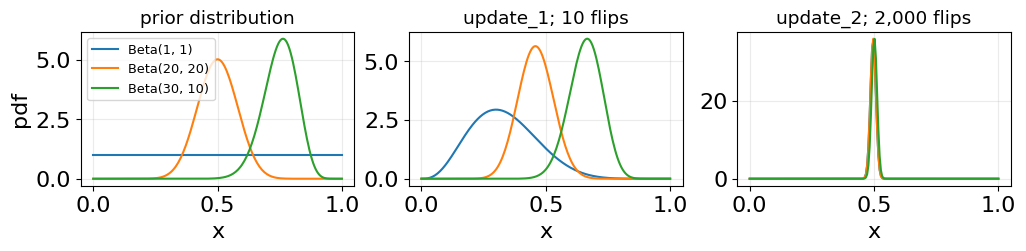

In [93]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 2))

N_data_points = 200
x_data = np.linspace(0, 1, N_data_points)

beta_pdf_config = [
  [1, 1], [20, 20], [30, 10]] 

# -- prior distributions
for alpha, beta in beta_pdf_config:
  y_data = beta_pdf(x_data, alpha, beta)
  axes[0].plot(x_data, y_data, label=f"Beta({alpha}, {beta})")

axes[0].set_xlabel("x")
axes[0].set_ylabel("pdf")
axes[0].grid("on")
# axes[0].legend(loc="upper left", bbox_to_anchor=[1.01, 1.02])
axes[0].legend(loc="best", fontsize="xx-small")
axes[0].set_title("prior distribution", fontsize="small")

# -- update_1
for alpha, beta in beta_pdf_config:
  y_data = beta_pdf(x_data, alpha+update_1["H"], beta+update_1["T"])
  axes[1].plot(x_data, y_data, label=f"Beta({alpha}, {beta})")

axes[1].set_xlabel("x")
axes[1].grid("on")
axes[1].set_title("update_1; 10 flips", fontsize="small")

# -- update_2
for alpha, beta in beta_pdf_config:
  y_data = beta_pdf(x_data, alpha+update_2["H"], beta+update_2["T"])
  axes[2].plot(x_data, y_data, label=f"Beta({alpha}, {beta})")

axes[2].set_xlabel("x")
axes[2].grid("on")
axes[2].set_title("update_2; 2,000 flips", fontsize="small")

plt.show(fig)